# Demonstration of Basic Neuron Models

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from neural._modelfields import Attr, Field

In [29]:
f = Field(type='gstates', vt=0.025, c=5.0, bias=0.01)

In [33]:
import numpy as np

In [38]:
np.array(np.atleast_2d([d.value for d in f._data.values()]), dtype=f.dtype)

array([[(0.025, 0.025, 0.025), (5.   , 5.   , 5.   ),
        (0.01 , 0.01 , 0.01 )]],
      dtype=[('vt', '<f8'), ('c', '<f8'), ('bias', '<f8')])

In [26]:
x = Attr('x', value=1, default=.0)

In [ ]:
F=

In [1]:
import cupy as cp
# import pycuda.autoinit
# import pycuda.gpuarray as garray
# from pycuda import cumath

In [26]:
testtype = np.dtype([('x', np.float_)])

In [32]:
np.empty(3, dtype=testtype)[2]

(1.6e-322,)

In [34]:
testtype(np.array([0]))

TypeError: 'numpy.dtype[void]' object is not callable

In [2]:
a = cp.abs(2)
a.fill(1)

In [4]:
from numbers import Number
isinstance(cp.abs(2), Number)

False

In [19]:
cp.float_ == np.float_

True

In [22]:
np.float_(np.inf)

numpy.float64

In [23]:
cp.abs(2).clip(0,np.inf)

array(2.)

In [14]:
np.array([0,1,2]).clip()

<function ndarray.clip>

In [9]:
import numpy as np
a = 0
np.clip(a, 1, 2, out=a)

TypeError: return arrays must be of ArrayType

In [22]:
cp.to_gpu

AttributeError: module 'cupy' has no attribute 'to_gpu'

In [20]:
from numbers import Number
isinstance(0., Number)

True

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import sys

from neural.model.neuron import *
from neural.plot import plot_multiple
from neural.utils import generate_stimulus

KeyboardInterrupt: 

Define input stimulus.

In [2]:
dt  = 1e-5
dur = 0.2

waveform = generate_stimulus('step', dt, dur-dt/2, (0.05, 0.15), 20.)
t = np.arange(0, len(waveform)*dt-dt/2, dt)

Simulate neuron models.

In [3]:
model_list = [IAF, LeakyIAF, HodgkinHuxley, Wilson, Rinzel, ConnorStevens]
record = {key:np.zeros(len(waveform)) for key in model_list}

for M in model_list:
    model = M()
    for i, wav in enumerate(waveform):
        model.update(dt, stimulus=wav)
        record[M][i] = model.v

Plot simulation result.

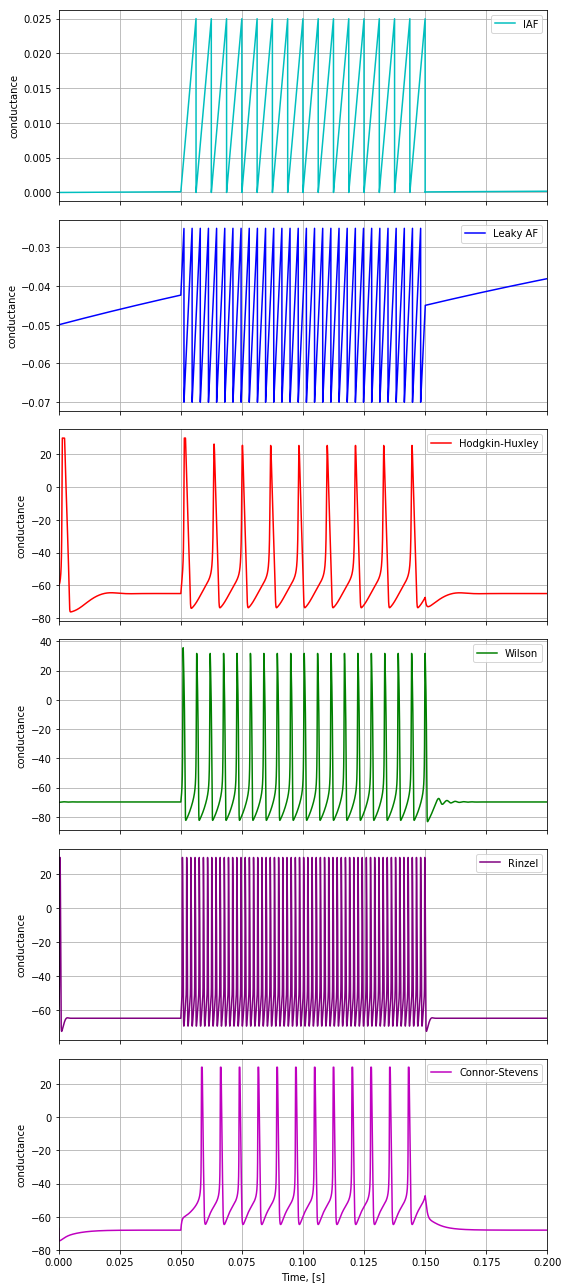

In [4]:
fig, axes = plot_multiple(
    t,
    (record[IAF], {'color':'c', 'label':'IAF'}),
    (record[LeakyIAF], {'color':'b', 'label':'Leaky AF'}),
    (record[HodgkinHuxley], {'color':'r', 'label':'Hodgkin-Huxley'}),
    (record[Wilson], {'color':'g', 'label':'Wilson'}),
    (record[Rinzel], {'color':'purple', 'label':'Rinzel'}),
    (record[ConnorStevens], {'color':'m', 'label':'Connor-Stevens'}),
    xlim=(0,dur), figw=8, figh=3, ylabel='conductance')